## Importing libraries

In [193]:
import logging
import numpy as np
import pandas as pd 
from IPython.display import Markdown, display

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import scipy.stats as st
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings(action="ignore")
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../script')))
from DataExplore import ExploreData
from df_helper import DfHelper
import plots


## Reading the Data set

In [194]:
df_helper = DfHelper()

In [231]:
store = df_helper.read_csv('../Data/store.csv')
submission = df_helper.read_csv('../Data/sample_submission.csv')
train = df_helper.read_csv('../Data/train.csv',)
test = df_helper.read_csv('../Data/test.csv')

In [232]:
print('The shape train Data set:', train.shape)
print('The shape test Data set :', test.shape)
print('The shape store Data set:', store.shape)

The shape train Data set: (1017209, 9)
The shape test Data set : (41088, 8)
The shape store Data set: (1115, 10)


In [250]:
class ExploreData():
    '''Print info, head, shape, missing values of a dataset
    Parameter:
        data DataFrame: pandas dataframe
    '''
    
    def __init__(self, data):
        self.data = data
    
    def __str__(self):
        self.summary()
        return ''
    
    def data(self):
        '''Return the dataset of current instance'''
        return self.data
    
    def summary(self):
        '''print summary of the dataset'''
        self.info()
        self.divider()
        self.head()
        self.divider()
        self.shape()
        self.divider()
        self.missing_values()
    
    def divider(self):
        '''print a horzontal line'''
        display(Markdown('---'))
    
    def info(self):
        '''print a concise summary of a DataFrame'''
        print('\nDataframe summary')
        display(self.data.info())

    def head(self, n=5):
        '''print out the first 5 rows of a dataframe'''
        print('\nFirst 5 rows')
        display(self.data.head(n))

    def shape(self):
        '''print out shape of a dataframe'''
        print('\nShape of the dataset')
        display(self.data.shape)

    def missing_values(self):
        '''print out count of  missing value of a dataframe'''
        print('\nMissing values count')
        display(self.data.isna().sum())

In [252]:
print(ExploreData(train))


Dataframe summary
<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          844338 non-null  int64 
 1   DayOfWeek      844338 non-null  int64 
 2   Date           844338 non-null  object
 3   Sales          844338 non-null  int64 
 4   Customers      844338 non-null  int64 
 5   Open           844338 non-null  int64 
 6   Promo          844338 non-null  int64 
 7   StateHoliday   844338 non-null  object
 8   SchoolHoliday  844338 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 64.4+ MB


None

---


First 5 rows


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


---


Shape of the dataset


(844338, 9)

---


Missing values count


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [253]:
print(ExploreData(store))


Dataframe summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


None

---


First 5 rows


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


---


Shape of the dataset


(1115, 10)

---


Missing values count


Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [236]:
#full_train = pd.merge(train, store, how = 'inner', on = 'Store')
#full_test = pd.merge(test, store, how = 'inner', on = 'Store')
#full_train


## Missing value treatment

### outlier detection

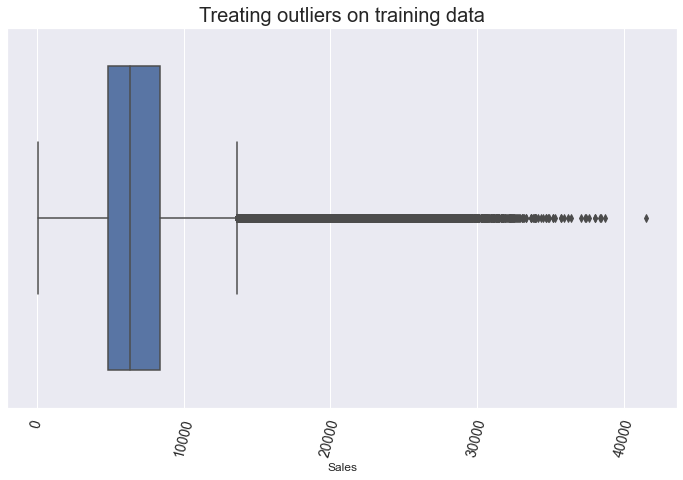

In [245]:
plots.plot_box(train, 'Sales', 'Treating outliers on training data')

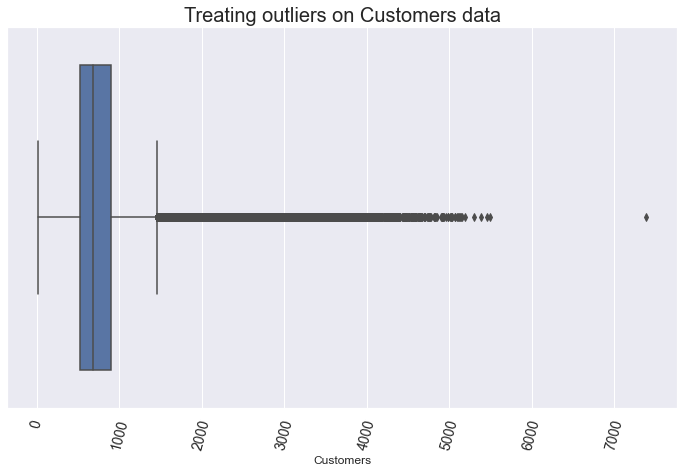

In [246]:
plots.plot_box(train, 'Customers', 'Treating outliers on Customers data')

In [247]:
# Removing outliers from training dataset using Sales as a parameter
data_clean_sales = Outlier(train).iqr_univariate(train.Sales)
# Removing outliers from training dataset using Customers as a parameter
data_train_clean = Outlier(data_clean_sales).iqr_univariate(data_clean_sales.Customers)
data_train_clean.shape

(788058, 9)

###  Checking seasonality  in both training and test sets

In [248]:
full_train.duplicated(subset=['Date', 'Store']).unique()

array([False])

In [249]:
data_train_clean['year'] = data_train_clean.index.year
data_train_clean['month'] = data_train_clean.index.month
data_train_clean['day'] = data_train_clean.index.day
data_train_clean['weekOfYear'] = data_train_clean.index.weekofyear
data_train_clean['dayOfWeek'] = data_train_clean.index.dayofweek

# is weekEnd day: True, not weekEnd day: False
data_train_clean['weekEnd'] = np.array([ (day in [5,6]) for day in data_train_clean.index.dayofweek])

# beginning of month, mid month and ending of month
# beginning : 0, mid : 1, ending : 2
def month_range(day):
    if (day in range(10)): return 0
    if (day in range(10, 20)): return 1
    return 2

data_train_clean['monthRange'] = data_train_clean['day'].apply(month_range)

# Sales per customer
data_train_clean['salePerCustomer'] = data_train_clean['Sales']/data_train_clean['Customers']
data_train_clean['salePerCustomer'].describe()

AttributeError: 'Int64Index' object has no attribute 'year'